# *Data Analysis - Homework 2*
*Jawher DRIDI*

In [0]:
# import necessary libraries
import pandas as pd # pandas
import seaborn as sns # seaborn package to generate nice plots
import matplotlib.pyplot as plt # matplotlib
import numpy as np # numpy

In [0]:
# read data
in_dd=pd.read_csv('/content/tn_stock_data_2018.csv.gz')
# convert date from string to datetime type
in_dd.date=pd.to_datetime(in_dd.date,format='%d/%m/%y')

In [417]:
# show top observations from the data
in_dd.head(3)

,date,C_GR_RLC,company_code,company,ref_price,yesterday_price,open,last,close,low,high,qty_traded,num_trades,value,I
0,2018-01-02,11,725001,ADWYA,5.35,5.35,5.25,5.39,5.39,5.25,5.39,2926,7,15635.50,NaN
1,2018-01-02,11,340005,AMEN BANK,24.35,24.35,24.38,24.00,24.00,24.00,24.38,1519,12,36918.00,NaN
2,2018-01-02,11,730001,ARTES,6.27,6.20,6.27,6.10,6.10,6.09,6.27,35875,67,219020.05,NaN


In [418]:
# check how many companies are in the data: 84 companies
len(in_dd.company.unique())

84

In [0]:
# calculate daily return for every company
in_dd['currReturn']=in_dd.groupby(['company'])['close'].pct_change()

In [420]:
# determine missing values
in_dd.isna().sum()

date                   0
C_GR_RLC               0
company_code           0
company                0
ref_price              0
yesterday_price        0
open                   0
last                   0
close                  0
low                    0
high                   0
qty_traded             0
num_trades             0
value               4873
I                  19857
currReturn            84
dtype: int64

In [421]:
# shape of the dataset
in_dd.shape

(20916, 16)

In [422]:
# checking if our work is done successfully
in_dd.isna().sum()

date                   0
C_GR_RLC               0
company_code           0
company                0
ref_price              0
yesterday_price        0
open                   0
last                   0
close                  0
low                    0
high                   0
qty_traded             0
num_trades             0
value               4873
I                  19857
currReturn            84
dtype: int64

In [0]:
# make a pivot to create a data matrix where columns are companies and rows are days; the values in the data matrix are for the returns
ret_data=in_dd.pivot(index='date',columns='company',values='currReturn').dropna()

In [0]:
# handle infinte values
ret_data=ret_data.replace([np.inf, -np.inf], 0)

In [425]:
# show the top entries from the returns matrix
ret_data.head(3)

company,ADWYA,AETECH,AIR LIQUDE TSIE,ALKIMIA,AMEN BANK,AMI DA 1/4 110817,AMS,ARTES,ASS MULTI ITTIHAD,ASSAD,ASSURANCES SALIM,ASTREE,ATB,ATELIER MEUBLE INT,ATL,ATTIJARI BANK,ATTIJARI LEASING,BEST LEASE,BH,BIAT,BNA,BT,BTE (ADP),CARTHAGE CEMENT,CELLCOM,CEREALIS,CIL,CIMENTS DE BIZERTE,CITY CARS,DELICE HOLDING,ELBENE INDUSTRIE,ELECTROSTAR,ENNAKL AUTOMOBILES,ESSOUKNA,EURO-CYCLES,GIF-FILTER,HANNIBAL LEASE,HEXABYTE,ICF,LAND OR,...,MPBS,NEW BODY LINE,OFFICEPLAST,ONE TECH HOLDING,PLAC. TSIE-SICAF,POULINA GP HOLDING,SAH,SANIMED,SERVICOM,SFBT,SIAME,SIMPAR,SIPHAT,SITEX,SITS,SOMOCER,SOPAT,SOTEMAIL,SOTETEL,SOTIPAPIER,SOTRAPIL,SOTUMAG,SOTUVER,SPDIT - SICAF,STAR,STB,STE TUN. DU SUCRE,STEQ,STIP,TAWASOL GP HOLDING,TELNET HOLDING,TPR,TUNINVEST-SICAR,TUNIS RE,TUNISAIR,UADH,UBCI,UIB,UNIMED,WIFACK INT BANK
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-03,-0.007421,0.039216,0.000000,0.000000,-0.000417,-0.138249,-0.025424,0.02459,-0.030303,-0.001111,0.000000,0.0,-0.007177,0.000000,0.000000,-0.012295,-0.009508,-0.026316,-0.002706,0.016088,0.007752,0.00128,-0.023823,-0.008584,0.005291,-0.019753,0.027316,-0.004,0.029767,0.000000,0.0,0.007547,0.016129,-0.010840,0.037736,-0.027027,0.000000,0.001894,0.002844,-0.033333,...,-0.028846,-0.010101,-0.046875,0.043939,0.0,0.053162,0.009026,-0.002336,-0.013158,0.024742,-0.029536,0.027804,-0.028302,0.0,0.000000,0.034483,0.000000,0.0,0.003559,-0.005682,0.000935,0.010363,-0.028340,-0.012195,0.020408,0.008130,0.0,0.0,0.0,-0.026316,0.013652,-0.022989,0.000000,-0.017857,-0.023256,0.004082,0.0,0.004089,0.019108,-0.002692
2018-01-04,0.037383,0.037736,-0.011236,-0.029989,-0.003752,0.000000,0.000000,0.00160,-0.045000,0.011123,0.000000,0.0,0.004819,-0.004016,0.003236,0.008852,0.002823,0.021622,-0.023332,-0.012500,-0.000855,0.00000,0.000595,-0.004329,-0.005263,0.027708,0.027746,0.000,-0.006323,0.029091,0.0,-0.014981,-0.007937,0.024658,0.036000,0.027778,0.003722,-0.028355,0.028004,0.020690,...,0.023102,-0.028571,-0.059016,-0.013062,0.0,-0.014795,0.008946,-0.004684,0.060000,-0.005030,-0.004348,-0.011139,-0.007767,0.0,0.046809,0.025000,0.027027,0.0,0.021277,-0.002857,0.017740,0.000000,-0.029167,0.000000,-0.000200,-0.005376,0.0,0.0,0.0,-0.027027,0.026936,-0.032353,0.000000,0.030303,0.023810,0.056911,0.0,-0.004525,-0.002500,-0.029690
2018-01-05,0.005405,0.018182,0.002273,-0.044929,0.003347,0.000000,0.000000,0.00000,-0.018325,0.012101,-0.029851,0.0,-0.011990,-0.020161,0.006452,0.010694,0.002252,0.000000,-0.001667,0.011814,-0.007699,0.00000,0.024985,0.021739,-0.026455,-0.004902,0.000000,0.000,0.044545,-0.004711,0.0,-0.003802,0.008000,0.008021,-0.017550,-0.013514,-0.011125,0.019455,0.000000,0.029730,...,-0.029032,0.008403,-0.041812,-0.013971,0.0,0.000000,0.025966,0.000000,0.056604,0.000000,-0.034934,-0.011494,0.029354,0.0,0.056911,0.048780,0.000000,0.0,0.000000,-0.025788,0.008257,-0.025641,-0.012876,0.000000,-0.029806,-0.021622,0.0,0.0,0.0,0.000000,0.013115,0.000000,0.029231,-0.012941,-0.023256,0.034615,0.0,0.000000,0.002506,-0.001391


In [426]:
cols = ret_data.columns.values
cols

array(['ADWYA', 'AETECH', 'AIR LIQUDE TSIE', 'ALKIMIA', 'AMEN BANK',
       'AMI DA 1/4 110817', 'AMS', 'ARTES', 'ASS MULTI ITTIHAD', 'ASSAD',
       'ASSURANCES SALIM', 'ASTREE', 'ATB', 'ATELIER MEUBLE INT', 'ATL',
       'ATTIJARI BANK', 'ATTIJARI LEASING', 'BEST LEASE', 'BH', 'BIAT',
       'BNA', 'BT', 'BTE (ADP)', 'CARTHAGE CEMENT', 'CELLCOM', 'CEREALIS',
       'CIL', 'CIMENTS DE BIZERTE', 'CITY CARS', 'DELICE HOLDING',
       'ELBENE INDUSTRIE', 'ELECTROSTAR', 'ENNAKL AUTOMOBILES',
       'ESSOUKNA', 'EURO-CYCLES', 'GIF-FILTER', 'HANNIBAL LEASE',
       'HEXABYTE', 'ICF', 'LAND OR', 'MAGASIN GENERAL',
       'MAGHREB INTERN PUB', 'MODERN LEASING', 'MONOPRIX', 'MPBS',
       'NEW BODY LINE', 'OFFICEPLAST', 'ONE TECH HOLDING',
       'PLAC. TSIE-SICAF', 'POULINA GP HOLDING', 'SAH', 'SANIMED',
       'SERVICOM', 'SFBT', 'SIAME', 'SIMPAR', 'SIPHAT', 'SITEX', 'SITS',
       'SOMOCER', 'SOPAT', 'SOTEMAIL', 'SOTETEL', 'SOTIPAPIER',
       'SOTRAPIL', 'SOTUMAG', 'SOTUVER', 'SPDIT - SICA

# First Field : Automobiles and Equipment VS BANKS

In [0]:
# choose the variables that we will work on it
cols_1 = ['WIFACK INT BANK','UIB','UBCI','STB','BTE (ADP)','BIAT','BH','BNA','BT','ATTIJARI BANK','ATB','AMEN BANK','GIF-FILTER', 'STIP', 'STEQ','ASSAD']

In [0]:
# dataset for the two fields
ret_data_1 = ret_data.loc[:,cols_1]

In [429]:
ret_data_1.head(3)

company,WIFACK INT BANK,UIB,UBCI,STB,BTE (ADP),BIAT,BH,BNA,BT,ATTIJARI BANK,ATB,AMEN BANK,GIF-FILTER,STIP,STEQ,ASSAD
date,,,,,,,,,,,,,,,,
2018-01-03,-0.002692,0.004089,0.0,0.008130,-0.023823,0.016088,-0.002706,0.007752,0.00128,-0.012295,-0.007177,-0.000417,-0.027027,0.0,0.0,-0.001111
2018-01-04,-0.029690,-0.004525,0.0,-0.005376,0.000595,-0.012500,-0.023332,-0.000855,0.00000,0.008852,0.004819,-0.003752,0.027778,0.0,0.0,0.011123
2018-01-05,-0.001391,0.000000,0.0,-0.021622,0.024985,0.011814,-0.001667,-0.007699,0.00000,0.010694,-0.011990,0.003347,-0.013514,0.0,0.0,0.012101


In [430]:
# Let's see the variance while increasing the num_pc
from sklearn.decomposition import PCA
X = np.asarray(ret_data_1)
[n,m] = X.shape
for i in range(1,17):
  pca = PCA(n_components=i) # number of principal components
  pca.fit(X)

  percentage =  pca.explained_variance_ratio_
  percentage_cum = np.cumsum(percentage)
  print (percentage_cum[-1]*100,'% of the variance is explained by the first',i,' PCs')


18.188183723860462 % of the variance is explained by the first 1  PCs
30.839644923738447 % of the variance is explained by the first 2  PCs
41.197250090282076 % of the variance is explained by the first 3  PCs
49.683884144577874 % of the variance is explained by the first 4  PCs
57.46601526230678 % of the variance is explained by the first 5  PCs
64.49396157699495 % of the variance is explained by the first 6  PCs
71.21992448772644 % of the variance is explained by the first 7  PCs
77.02637247081083 % of the variance is explained by the first 8  PCs
82.32012218634159 % of the variance is explained by the first 9  PCs
86.01184594172469 % of the variance is explained by the first 10  PCs
89.0364050085885 % of the variance is explained by the first 11  PCs
91.69782975291932 % of the variance is explained by the first 12  PCs
94.18397963433843 % of the variance is explained by the first 13  PCs
96.26448231860469 % of the variance is explained by the first 14  PCs
98.15253904490092 % of the

* we can see that with 16 PCs we can get almost all the variance of that dataset.
* Let's examine in particular the case of num_pc = 3 and num_pc = 2

In [431]:
#num_pc = 3
num_pc = 3


print ('The number of timestamps is {}.',n)
print ('The number of stocks is {}.',m)

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print (percentage_cum[-1]*100,'% of the variance is explained by the first 2 PCs')

pca_components = pca.components_

The number of timestamps is {}. 248
The number of stocks is {}. 16
41.197250090282076 % of the variance is explained by the first 2 PCs


* We are approximation the matrix X of 16 variables to a new matrix with num_pc variables

* Here we are loosing 59% of the data

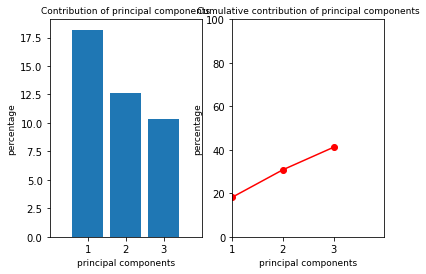

In [432]:
#Now we collect the first 2 principal components and plot their contributions.
x = np.arange(1,len(percentage)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of principal components',fontsize = 9)
plt.xlabel('principal components',fontsize = 9)
plt.ylabel('percentage',fontsize = 9)
plt.xticks(x,fontsize = 10) 
plt.yticks(fontsize = 10)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('principal components',fontsize = 9)
plt.ylabel('percentage',fontsize = 9)
plt.title('Cumulative contribution of principal components',fontsize = 9)
plt.xticks(x,fontsize = 10) 
plt.yticks(fontsize = 10)
plt.xlim([1, num_pc+1])
plt.ylim([0,100]);

* From the second graph, we can notice that the trend of the variance with regard to the num_pc is not linear. But the slope decreases while we increase the num_pc and this is expected.

In [433]:
#num_pc = 2
num_pc = 2


print ('The number of timestamps is {}.',n)
print ('The number of stocks is {}.',m)

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print (percentage_cum[-1]*100,'% of the variance is explained by the first 2 PCs')

pca_components = pca.components_

The number of timestamps is {}. 248
The number of stocks is {}. 16
30.839644923738447 % of the variance is explained by the first 2 PCs


* Here we are loosing 69% of the data

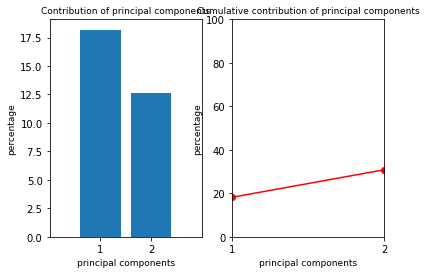

In [434]:
#Now we collect the first 2 principal components and plot their contributions.
x = np.arange(1,len(percentage)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of principal components',fontsize = 9)
plt.xlabel('principal components',fontsize = 9)
plt.ylabel('percentage',fontsize = 9)
plt.xticks(x,fontsize = 10) 
plt.yticks(fontsize = 10)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('principal components',fontsize = 9)
plt.ylabel('percentage',fontsize = 9)
plt.title('Cumulative contribution of principal components',fontsize = 9)
plt.xticks(x,fontsize = 10) 
plt.yticks(fontsize = 10)
plt.xlim([1, num_pc])
plt.ylim([0,100]);

* As we can see here, those two graphs explains the amount of variance that each PC got. For exampe, the first PC as it is expected got the biggest variance (around 18%). If we sum all these rates, we will got 30.9% of variance.


In [435]:
#From these principal components we can construct "statistical risk factors",
# similar to more conventional common risk factors. These should give us an idea of how much 
#of the currReturn comes from some unobservable statistical feature.
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2"], 
                              index=ret_data_1.index,
                              data=factor_returns)
factor_returns.head(20)

,factor 1,factor 2
date,,
2018-01-03,-0.003639,-0.003056
2018-01-04,0.007816,-0.001133
2018-01-05,0.006012,0.000791
2018-01-08,-0.018235,0.050861
2018-01-09,0.013615,0.008769
2018-01-10,-0.004084,0.041623
2018-01-11,-0.039495,0.029052
2018-01-12,-0.027502,-0.055431
2018-01-15,0.003131,-0.054129


* We can notice that a small percentage of the currReturn comes from unbsorvable statistical features.

In [0]:
factor_exposures = pd.DataFrame(index=["factor 1", "factor 2"], 
                                columns=ret_data_1.columns,
                                data = pca.components_).T

In [437]:
factor_exposures

,factor 1,factor 2
company,,
WIFACK INT BANK,-0.029179,0.100750
UIB,-0.371909,-0.056934
UBCI,0.002179,-0.002172
STB,-0.450654,0.038612
BTE (ADP),0.047872,0.126161
BIAT,-0.357041,-0.062424
BH,-0.326409,-0.083331
BNA,-0.300188,-0.088356
BT,-0.287889,0.063166


In [0]:
labels = factor_exposures.index
data = factor_exposures.values

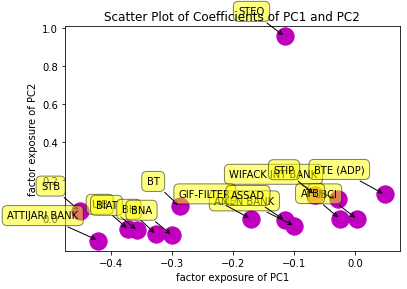

In [439]:
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='m',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    );



* We can notice here that for the second PC both of the fields has low coefficients, that means that this PC is not driven a lot by those two fields.

* For the first PC, we can notice that it's more driven by the banks then the automobiles. Indeed, the coefficients are low but those of the banks are a bit bigger than the automobiles.

# Second Field : Insurance vs CONSUMPTION

In [0]:
# choose the variables that we will work on it
cols_2 = ['TUNIS RE', 'STAR', 'BH','ASTREE','OFFICEPLAST','NEW BODY LINE']

In [0]:
# dataset for the month of July
ret_data_2 = ret_data.loc[:,cols_2]

In [442]:
ret_data_2.head()

company,TUNIS RE,STAR,BH,ASTREE,OFFICEPLAST,NEW BODY LINE
date,,,,,,
2018-01-03,-0.017857,0.020408,-0.002706,0.0,-0.046875,-0.010101
2018-01-04,0.030303,-0.000200,-0.023332,0.0,-0.059016,-0.028571
2018-01-05,-0.012941,-0.029806,-0.001667,0.0,-0.041812,0.008403
2018-01-08,-0.021454,-0.000103,-0.009460,0.0,0.058182,-0.002083
2018-01-09,-0.023143,-0.020518,-0.006742,0.0,0.024055,0.000000


In [443]:
# Let's see the variance while increasing the num_pc
X = np.asarray(ret_data_2)
[n,m] = X.shape
for i in range(1,6):
  pca = PCA(n_components=i) # number of principal components
  pca.fit(X)

  percentage =  pca.explained_variance_ratio_
  percentage_cum = np.cumsum(percentage)
  print (percentage_cum[-1]*100,'% of the variance is explained by the first',i,' PCs')


30.816062863990062 % of the variance is explained by the first 1  PCs
59.22684811339736 % of the variance is explained by the first 2  PCs
75.03099556927988 % of the variance is explained by the first 3  PCs
88.78006157785453 % of the variance is explained by the first 4  PCs
96.85222456334917 % of the variance is explained by the first 5  PCs


* We can see that just from 5 PCs we can get almost all the variance of the dataset.

In [444]:
#num_pc = 2
from sklearn.decomposition import PCA
num_pc = 2


print ('The number of timestamps is {}.',n)
print ('The number of stocks is {}.',m)

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print (percentage_cum[-1]*100,'% of the variance is explained by the first 2 PCs')

pca_components = pca.components_

The number of timestamps is {}. 248
The number of stocks is {}. 6
59.22684811339736 % of the variance is explained by the first 2 PCs


 * Here we lost almost 40% of the data

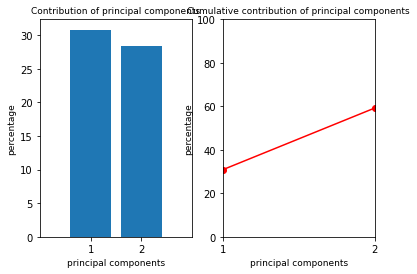

In [445]:
#Now we collect the first 2 principal components and plot their contributions.
x = np.arange(1,len(percentage)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of principal components',fontsize = 9)
plt.xlabel('principal components',fontsize = 9)
plt.ylabel('percentage',fontsize = 9)
plt.xticks(x,fontsize = 10) 
plt.yticks(fontsize = 10)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('principal components',fontsize = 9)
plt.ylabel('percentage',fontsize = 9)
plt.title('Cumulative contribution of principal components',fontsize = 9)
plt.xticks(x,fontsize = 10) 
plt.yticks(fontsize = 10)
plt.xlim([1, num_pc])
plt.ylim([0,100]);

* Notice here that the first PC gives 31% of the data and the second gives almost 28% of the data

In [446]:
#From these principal components we can construct "statistical risk factors",
# similar to more conventional common risk factors. These should give us an idea of how much 
#of the currReturn comes from some unobservable statistical feature.
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2"], 
                              index=ret_data_2.index,
                              data=factor_returns)
factor_returns.head(20)

,factor 1,factor 2
date,,
2018-01-03,-0.002464,0.049658
2018-01-04,-0.029422,0.053285
2018-01-05,-0.045423,0.018266
2018-01-08,0.029148,-0.047550
2018-01-09,-0.003686,-0.030803
2018-01-10,-0.003134,0.006476
2018-01-11,0.005247,-0.009736
2018-01-12,-0.022972,-0.020350
2018-01-15,-0.011140,-0.003551


* We can not notice that the first risk factor is very very low as well as the second.

In [0]:
factor_exposures = pd.DataFrame(index=["factor 1", "factor 2"], 
                                columns=ret_data_2.columns,
                                data = pca.components_).T

In [448]:
factor_exposures

,factor 1,factor 2
company,,
TUNIS RE,-0.105841,0.033961
STAR,0.804110,0.540617
BH,0.199029,-0.146140
ASTREE,-0.021151,0.012197
OFFICEPLAST,0.486583,-0.827684
NEW BODY LINE,-0.255699,-0.003754


In [0]:
labels = factor_exposures.index
data = factor_exposures.values

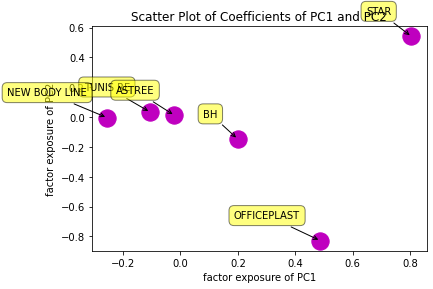

In [450]:
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='m',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    );



* We notice here that that first PC is driven by the consumption field via the company OFFICEPLAST that got a coefficient around 0.5 and it is almost a bit driven by the insurance field via the company STAR but in general it's not driven by almost all the companies.

* For the second component, it's not driven by the insurance field: all most all the companies has a 0 coefficient. But it's  driven by the consumption field via the OFFICEPLAST company that has a coefficient around -0.8.